In [1]:
import pandas as pd
import cudf
from utils.clustering import *
from utils.dim_reduction.dim_reduction import *
from utils.preprocessing import*

In [2]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

In [3]:
df1 = pd.read_csv("datasets/sensors2/df_ETL_2020_03.csv")
df1

,Unnamed: 0,DateTime,Local,Velocidade,Pressao,StrainGage1,AcelerometroX,AcelerometroY,AcelerometroZ,Tensao,...,DeslocamentoBD,FileName,Linha,Extension,km_code,M_ini,M_fim,Direcao,Raio,Elemento
0,0,01-03-2020 05:12:37,91/92,1.527778,89.4,14.8,0.0,0.2,-1.1,13.3,...,-2.7,2020_03_01_M102_504939_VLB_VTU.xlsx,L1,310,530625530315,530315,530625,T,0,CURVA 22
1,1,01-03-2020 05:12:38,91/92,1.527778,89.8,-6.5,0.1,0.0,-0.8,13.4,...,-2.8,2020_03_01_M102_504939_VLB_VTU.xlsx,L1,310,530625530315,530315,530625,T,0,CURVA 22
2,2,01-03-2020 05:12:39,91/92,1.527778,89.8,2.2,0.1,0.0,-0.9,13.4,...,-3.0,2020_03_01_M102_504939_VLB_VTU.xlsx,L1,310,530625530315,530315,530625,T,0,CURVA 22
3,3,01-03-2020 05:12:40,91/92,1.527778,89.4,-20.3,0.0,0.1,-1.0,13.3,...,-2.6,2020_03_01_M102_504939_VLB_VTU.xlsx,L1,310,530625530315,530315,530625,T,0,CURVA 22
4,4,01-03-2020 05:12:43,91/92,1.527778,89.8,-27.9,0.1,0.1,-1.1,13.4,...,-2.6,2020_03_01_M102_504939_VLB_VTU.xlsx,L1,310,530625530315,530315,530625,T,0,CURVA 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248027,248027,04-04-2020 17:43:11,204I/204V,0.000000,74.8,34.9,0.0,0.0,-0.9,12.8,...,0.2,2020_04_05_M374_517 016_VBR_VTU.xlsx,L2,515,1639215877,15877,16392,NaN,0,CURVA 1
248028,248028,04-04-2020 17:43:10,204I/204V,0.000000,75.2,22.3,0.0,0.0,-0.9,12.8,...,0.6,2020_04_05_M374_517 016_VBR_VTU.xlsx,L2,515,1639215877,15877,16392,NaN,0,CURVA 1
248029,248029,04-04-2020 17:43:09,204I/204V,0.000000,74.8,34.9,0.0,0.0,-0.9,12.8,...,0.2,2020_04_05_M374_517 016_VBR_VTU.xlsx,L2,515,1639215877,15877,16392,NaN,0,CURVA 1
248030,248030,04-04-2020 17:43:08,204I/204V,0.000000,75.2,21.1,0.0,0.0,-0.9,12.8,...,0.5,2020_04_05_M374_517 016_VBR_VTU.xlsx,L2,515,1639215877,15877,16392,NaN,0,CURVA 1


In [4]:
num_cols = ['Velocidade',
       'AcelerometroX', 'AcelerometroY', 'AcelerometroZ',
       'AcelerometroAE', 'AcelerometroBE', 'AcelerometroAD',
       'AcelerometroBD', 'DeslocamentoAE', 'DeslocamentoBE', 'DeslocamentoAD',
       'DeslocamentoBD']

df2 = df1[num_cols]
df2

,Velocidade,AcelerometroX,AcelerometroY,AcelerometroZ,AcelerometroAE,AcelerometroBE,AcelerometroAD,AcelerometroBD,DeslocamentoAE,DeslocamentoBE,DeslocamentoAD,DeslocamentoBD
0,1.527778,0.0,0.2,-1.1,0.3,0.4,-1.0,0.9,28.9,-196.2,-4.9,-2.7
1,1.527778,0.1,0.0,-0.8,-0.3,-0.4,-0.6,-0.8,28.1,-194.8,-5.8,-2.8
2,1.527778,0.1,0.0,-0.9,0.3,0.2,-0.5,-0.7,28.6,-195.6,-5.7,-3.0
3,1.527778,0.0,0.1,-1.0,-0.3,-0.3,-1.0,0.6,27.8,-194.4,-4.9,-2.6
4,1.527778,0.1,0.1,-1.1,0.9,0.2,-1.0,0.8,28.0,-194.9,-4.6,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
248027,0.000000,0.0,0.0,-0.9,0.0,-0.2,-0.6,-0.2,20.7,-195.2,-11.6,0.2
248028,0.000000,0.0,0.0,-0.9,-0.3,0.1,-1.0,0.0,21.2,-196.0,-12.2,0.6
248029,0.000000,0.0,0.0,-0.9,-0.3,-0.2,-0.6,0.0,21.2,-196.0,-11.4,0.2
248030,0.000000,0.0,0.0,-0.9,0.1,0.1,-1.0,-0.2,20.7,-195.2,-12.3,0.5


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


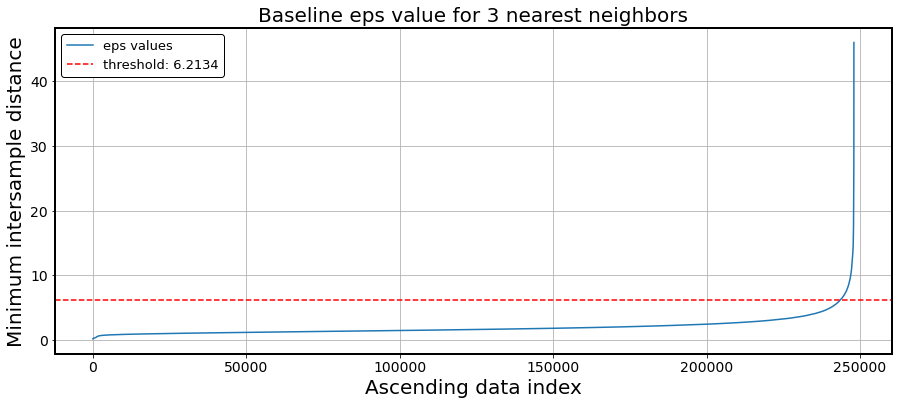

In [5]:
db = dbscans(df2,use_cuda=True)
db.plot_baseline_eps()


In [6]:
db.create_model(6.2)

In [7]:
r = db.clustering()
r

,Velocidade,AcelerometroX,AcelerometroY,AcelerometroZ,AcelerometroAE,AcelerometroBE,AcelerometroAD,AcelerometroBD,DeslocamentoAE,DeslocamentoBE,DeslocamentoAD,DeslocamentoBD,cluster_dbscan
0,1.527778,0.0,0.2,-1.1,0.3,0.4,-1.0,0.9,28.9,-196.2,-4.9,-2.7,0
1,1.527778,0.1,0.0,-0.8,-0.3,-0.4,-0.6,-0.8,28.1,-194.8,-5.8,-2.8,0
2,1.527778,0.1,0.0,-0.9,0.3,0.2,-0.5,-0.7,28.6,-195.6,-5.7,-3.0,0
3,1.527778,0.0,0.1,-1.0,-0.3,-0.3,-1.0,0.6,27.8,-194.4,-4.9,-2.6,0
4,1.527778,0.1,0.1,-1.1,0.9,0.2,-1.0,0.8,28.0,-194.9,-4.6,-2.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248027,0.000000,0.0,0.0,-0.9,0.0,-0.2,-0.6,-0.2,20.7,-195.2,-11.6,0.2,0
248028,0.000000,0.0,0.0,-0.9,-0.3,0.1,-1.0,0.0,21.2,-196.0,-12.2,0.6,0
248029,0.000000,0.0,0.0,-0.9,-0.3,-0.2,-0.6,0.0,21.2,-196.0,-11.4,0.2,0
248030,0.000000,0.0,0.0,-0.9,0.1,0.1,-1.0,-0.2,20.7,-195.2,-12.3,0.5,0
